# Montein GPP
<p dir="rtl" style="text-align: right;">
*   אנחנו מדברים על פפחמן שמתקבע . לא כולו הופך לביומסה אלא חלק מבוזבז בתהליך נשימה. הצמחים מספקים לעצמם את האנרגיה בעזרת אנרגיתת השמש ופד"ח. אנחנו נתמקד בעיקר בNPP - יצרנות פחות נשימה. (נשימה מתחלקת לצורך גידול ולצורך אחזקת מה שקיים בצמח). יצרנות זו משתנה מאוד במרחב.מעקב אחר היצרנות חשוב כדי להבין איפה יש שינויים בכדו"הא זה חשוב כדי לעשות מאזני פחמן באטמוספרה 

<p dir="rtl" style="text-align: right;">
* יש קשר בין הכמות של הפחמן המקובע לבין כמות הקרינה (שהיא המקור האנרגטי לתהליך הזה). מקומות עם יותר קרינה תהיה בהם יותר יצרננות פחמן. יש התחשבות בשטח האפקטיבי לקבלת קרינה וגם בקבוע שלוקח בחשבון כה בפועל הצמח לוקח תןך הפוטנציאל שלו.  הקבוע הזה הוא מה שמשתנה מאוד כתלות בתנאים.תלוי בטמפרטורה, גרעון לחץ אדים , קרינה, מים זמינים, כמות פד"ח. גרעון לחץ אדים גבוה - יש פחות פוטוסינתזה כי הפיוניות ייסגרו. יש עוד פרמטרים שונים שישפיעו על כמות הפחמן לא רק הקרינה .

<p dir="rtl" style="text-align: right;">
היחידות הן של מסה ליחידת שטח וזמן. 
<p dir="rtl" style="text-align: right;">

# monthis model
<p dir="rtl" style="text-align: right;">
 - את שטח האפקטיבי לאנרגיה אפשר לקבל מLAI  או NDVI כמו שעשינו fvc . את הכמות של הקרי נה אפשר להניח ש46 אחוז מסך הקרינה בתחום הסולרי היא בתחום של קליטת הצמחים. 
<p dir="rtl" style="text-align: right;">
יש לצמח מנגנון לווסת את כמות האנרגיה שמגיעה אליו. על ידי שימוש בה לכל מיני פיגמנטים. מעבר לכמות מסוימת של אנרגיה שתתלך לפוטוס' הוא ייקח את האנרגיה העודפת למחזור הזה של פיגמנטציה. זה קורה בטווח הצהוב 530 ננומטר. ריכוז הפיגמנט ישתנה בתנאים שונים. בצל יהיה פחות מהפיגמנט שיש בתנאים של שמש. ויעילות השימוש באור גדולה יותר כי לצמח אין צורך במנגנון ההגנה כמו בשמש. בנוסף גם בכמות חנקן גבוהה נצטרך פחות מנגנוני הגנה ויש פחות.

<p dir="rtl" style="text-align: right;">
יש ניסיון בחישה מרחוק לקלוט את הכמות של הפיגמנט הזה כדי לחשב את הכמות של הפיגמנטציה הזאת. האינדקס נקרא PRI ויש לו קורלציה טובה ללכמות האור האפקטיבית לפוטוסינתזה. 

<p dir="rtl" style="text-align: right;">
בתרגיל נעבוד עם תןצר של מודיס של NPP שמבוסס על מה שלמדנו. נחשב את היצרנות באזור הכרמל ולהציג אותה. בנוסף כמה פד"ח נפלט לאטמוספרה בעקבות השריפה בכרמל. 
נחשב את הכמות שנצרכה במשך חמישים השנה שהיער צרך ואחר כך נפחית את הכמות שלא נשרפה: השורשים, השטח שלא נשרף וכמות הנוף שלא נשרפה בתוך מה שכן נשרף.


## importing the liberies and packages and connecting GEE

In [1]:
!pip install cftime
!pip install --no-binary shapely shapely --force
!pip install cartopy
!pip install rioxarray
!pip install geopandas
!pip install pycrs


     |████████████████████████████████| 389kB 4.0MB/s 
Skipping wheel build for shapely, due to binaries being disabled for it.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Shapely 1.7.1
    Uninstalling Shapely-1.7.1:
      Successfully uninstalled Shapely-1.7.1
    Running setup.py install for shapely ... done
     |████████████████████████████████| 12.1MB 7.7MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 225kB 41.1MB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37m-linux_x86_64.whl size=12516182 sha256=8b227e8b7a3210f7fdfb1109d919047eeea2bca8f4f95811c73cc04638d552b9
  Stored in directory: /root/.cache/pip/wheels/45/7f/3b/37879587817fd1bbbee7b47312e2401b4f542cccf2fbe9b4ee
Successfully built cartopy
  Created wheel for pyshp: filename=

In [2]:
import os
import warnings
import cartopy
import rioxarray
import matplotlib.pyplot as plt
import numpy.ma as ma
import xarray as xr
import rioxarray as rio
from shapely.geometry import mapping, box
import rasterio
from rasterio.plot import show
warnings.simplefilter('ignore')
import math
import numpy as np 
import sklearn.metrics as metrics
from osgeo import gdal, gdalconst
from gdalconst import GA_ReadOnly
from matplotlib import ticker
import cartopy.crs as ccrs

In [3]:
# Import GEE for python and get into your account
import ee

# Trigger the authentication flow.
ee.Authenticate()

# Initialize the library.
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=8YqGdUCdStN6qi9NKpk7YTU-ftiZeSQaOX9zfYmQjSk&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/1AY0e-g4pCJvdM5P3sqmCmSIlYJ7q5Rb8r8eMbwSIzZWQHeY3tbZUViBKA8c

Successfully saved authorization token.


## Question 1

In [ ]:

for year in range(2001,2010):
  # Go to GEE and download data (image/s) for your AOI (data file/s will be downloaded to your Google Drive account)
  product_name = 'MODIS/006/MOD17A3HGF'
  band         = 'Npp'
  name_to_save = 'Npp_Carmel_' + str(year)
  scale_res    = 500 

  # ============================================================================= #
  # Don't change anything below this line
  # ============================================================================= #

  img          = ee.Image(product_name + '/' + str(year) + '_01_01').select(band);
  fc           = ee.FeatureCollection('users/yehudatoungshtein/MtCarmel_aoi_clip_polygon'); # HERE change it to your GEE address of your shp file 

  task = ee.batch.Export.image.toDrive(image=img,     # an ee.Image object.
                                      region         = fc.geometry().bounds(), # an ee.Geometry object.
                                      description    = name_to_save,
                                      folder         = 'gdrive_folder',
                                      fileNamePrefix = name_to_save,
                                      scale          = scale_res,
                                      crs='EPSG:4326')
  task.start()

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# creating empty array and appending the values of every year
array_npp = xr.open_rasterio("/content/drive/MyDrive/gdrive_folder/Npp_Carmel_2009.tif")
array_npp = array_npp * 0

#  adding the total NPP of all year to the array
for year in range(2001,2010):
  file_new    = "/content/drive/MyDrive/gdrive_folder/Npp_Carmel_"+ str(year) +".tif"
  array_year                  = xr.open_rasterio(file_new)
  array_year                 = array_year * 1.0
  array_year                 = array_year * 0.0001       #scale factor of the band
  array_npp                  = array_npp + array_year 
  # print(year, array_npp.sum())                         #for debagging 
array_averege = array_npp/9                              # averege of the array                  
array_averege = array_averege * 1000                     # convert [KG] into [g]

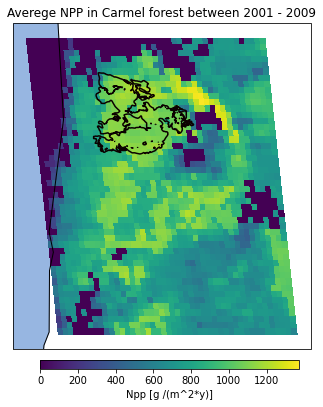

In [40]:
import geopandas as gpd

# importing the poligon of area:
wildfirePoligon  = gpd.read_file('/content/drive/MyDrive/gdrive_folder/MtCarmel_wildfire_area.shp') 

# graph:
array_input = array_averege

plt.figure(figsize=(9,6))

ax1 = plt.axes(projection=ccrs.Robinson())
ax1.coastlines()
ax1.add_feature(cartopy.feature.OCEAN)
ax1.add_feature(cartopy.feature.LAKES, alpha=1.0)
ax1.add_feature(cartopy.feature.RIVERS)

p1 = array_input.plot(ax=ax1,
             cmap='viridis',
             transform=ccrs.PlateCarree(),
             add_colorbar=False)
# p2 = wildfirePoligon.boundary.plot(ax=ax1, color='red')
p2 = wildfirePoligon.boundary.plot(ax=ax1,
             cmap='hot',
             transform=ccrs.PlateCarree(),
             )

plt.title('Averege NPP in Carmel forest between 2001 - 2009')

ax_cb = plt.axes([0.325, 0.08, 0.40, 0.02])
tick_locator = ticker.MaxNLocator(nbins=8)
cb = plt.colorbar(p1, cax=ax_cb, orientation='horizontal')
cb.locator = tick_locator
cb.update_ticks()
cb.ax.set_xlabel('Npp [g /(m^2*y)]');

## Question 2

#### import the product of 2011 and creating an array:

In [41]:

img = ee.Image("MODIS/006/MOD17A3HGF/2011_01_01").select('Npp');
fc= ee.FeatureCollection('users/yehudatoungshtein/MtCarmel_aoi_clip_polygon');


task = ee.batch.Export.image.toDrive(image=img,     # an ee.Image object.
                                     region         = fc.geometry().bounds(), # an ee.Geometry object.
                                     description    = 'Npp_Carmel_2011',
                                     folder         = 'gdrive_folder',
                                     fileNamePrefix = 'Npp_Carmel_2011',
                                     scale          = 500,
                                     crs='EPSG:4326')
task.start()

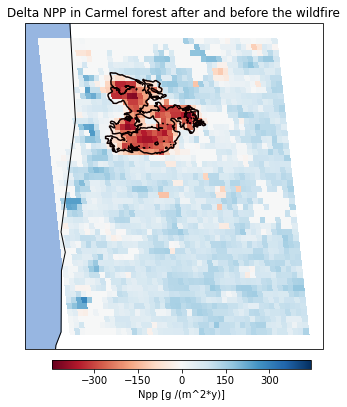

In [42]:
# creating array of 2011
file_new    = "/content/drive/MyDrive/gdrive_folder/Npp_Carmel_2011.tif"
array_2011                 = xr.open_rasterio(file_new)
array_2011                = array_2011* 1.0
array_2011                = array_2011* 0.0001 * 1000       #scale factor of the band and converting into [g]

# defining new array that equl to the different between the averege Npp before the fire and the amount after it:
Delta_Npp = array_2011 - array_averege
# map:
array_input = Delta_Npp

plt.figure(figsize=(9,6))

ax1 = plt.axes(projection=ccrs.Robinson())
ax1.coastlines()
ax1.add_feature(cartopy.feature.OCEAN)
ax1.add_feature(cartopy.feature.LAKES, alpha=1.0)
ax1.add_feature(cartopy.feature.RIVERS)

p1 = array_input.plot(ax=ax1,
             cmap='RdBu',
             transform=ccrs.PlateCarree(),
             add_colorbar=False)
p2 = wildfirePoligon.boundary.plot(ax=ax1,
             cmap='hot',
             transform=ccrs.PlateCarree(),
             )

plt.title('Delta NPP in Carmel forest after and before the wildfire')

ax_cb = plt.axes([0.325, 0.08, 0.40, 0.02])
tick_locator = ticker.MaxNLocator(nbins=8)
cb = plt.colorbar(p1, cax=ax_cb, orientation='horizontal')
cb.locator = tick_locator
cb.update_ticks()
cb.ax.set_xlabel('Npp [g /(m^2*y)]');


You can see from the map the decrease in the amount of NPP after the fire (negative values painted in red on the map)

## Question 3

### calculation the total area of the forest and the wildfire area

In [43]:
# i will use the array of the averege to calculate the area of the forest:

total_area_array = (array_averege*0 + 1) * (500**2) # every pixel is covering 500*500 [m]
# print(total_area_array)                           #uncomment to see the array
total_area = total_area_array.sum()                 # the total area of the forest [m^2]
total_area

<xarray.DataArray ()>
array(5.52e+08)

In [44]:
# now lets do the same prosses for the wild fire poligon:
img = ee.Image("MODIS/006/MOD17A3HGF/2011_01_01").select('Npp');
fc= ee.FeatureCollection('users/yehudatoungshtein/MtCarmel_wildfire_area');


task = ee.batch.Export.image.toDrive(image=img,     # an ee.Image object.
                                     region         = fc.geometry().bounds(), # an ee.Geometry object.
                                     description    = 'Npp_Carmel_2011_wildfire',
                                     folder         = 'gdrive_folder',
                                     fileNamePrefix = 'Npp_Carmel_2011_wildfire',
                                     scale          = 500,
                                     crs='EPSG:4326')
task.start()

In [45]:
# creating array of wildfire
file_new    = "/content/drive/MyDrive/gdrive_folder/Npp_Carmel_2011_wildfire.tif"
area_wildfire_array                = xr.open_rasterio(file_new)
area_wildfire_array                = area_wildfire_array* (1.0 *0) +1
area_wildfire_array                = area_wildfire_array* (500**2)
area_wildfire = area_wildfire_array.sum()
area_wildfire

<xarray.DataArray ()>
array(73500000.)

### calculation of total amount of carbon consumed by the forest over time (total Npp)

In [107]:
# assuming that the average age of the forest is 50 years
total_Npp = (array_averege.sum()) * 50 *500 *500  # [g]
total_Npp

<xarray.DataArray ()>
array(1.92662567e+13)

### Calculation of the amount of Carbon that released from Mt. Carmel forests and woodlands during the wildfire

In [110]:
Carbon_released = total_Npp * (area_wildfire/total_area)  # just for the burned area
Carbon_released = Carbon_released * 0.4      # only 40% of the aboveground biomass was burn
Carbon_released = Carbon_released * (0.7)      # the roots biomass is 0.3 of the total and they didnf burned
Carbon_released #[g]

<xarray.DataArray ()>
array(718.29630833)


<xarray.DataArray ()>
array(7.18296308e+11)

## Question 4

In [99]:
AM = 5.132e21 # [g air]
CR = (29/12) * (Carbon_released/AM) * (10**6) # [mol(c)/mol(air) ]
CR

<xarray.DataArray ()>
array(0.00033825)

## Question 5

In [101]:
precentege = (CR/0.76) *100 
precentege # %

<xarray.DataArray ()>
array(0.04450616)

## Question 6

According to Prof. Dan Yatir's study, the fire released close to 500,000 tons of CO2 into the atmosphere = 500*10^9 [g CO2] = 500*10^9*(12/12+16+16) [gC]

In [103]:
c_co2_ratio = 12/(12+32)
Carbon_released_study = c_co2_ratio * 500e9
deviation = ((Carbon_released-Carbon_released_study)/(Carbon_released)) *100
different = Carbon_released-Carbon_released_study
print(different)
print(deviation)

<xarray.DataArray ()>
array(5.81932672e+11)
<xarray.DataArray ()>
array(81.01568464)


<p dir="rtl" style="text-align: right;">
ניתן לראות שהסטיה בין הכמות שחישבנו לבין ההערכה של דן יתיר היא כמעט של 100 אחוז. זה כמובן ממש גבוה אך צריך לשים לב שדן יתיר חישב את השטח כ40 אלף דונם בעוד שלפי החישוב שלנו שטח השריפה היה 73.5 אלף דונם. נעשה את החישוב מחדש ונציב את ההערכה של דן יתיר עבור השטח שאנחנו חישבנו. על פי ההערכה שלו כל דונם משחרר 840 קג פד"ח

In [104]:
Carbon_released_study= area_wildfire/(1000) * c_co2_ratio * 840e3
deviation = ((Carbon_released-Carbon_released_study)/(Carbon_released)) *100
different = Carbon_released-Carbon_released_study
print(different)
print(deviation)

<xarray.DataArray ()>
array(7.01458127e+11)
<xarray.DataArray ()>
array(97.65581674)


<p dir="rtl" style="text-align: right;">
האמדן המינימלי המובא הוא של 175000 טון של פחמן. ננסה להשוות את החישוב שלנו להערכה הזו:

In [106]:
c_co2_ratio = 12/(12+32)
Carbon_released_study = c_co2_ratio * 175e9
deviation = ((Carbon_released-Carbon_released_study)/(Carbon_released)) *100
different = Carbon_released-Carbon_released_study
print(different)
print(deviation)

<xarray.DataArray ()>
array(6.70569036e+11)
<xarray.DataArray ()>
array(93.35548963)
